<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 3 - RECOMMENDATION SYSTEM  </h1> </center> <br>
<center> PROJECT 2021/2022 - MDSAA-BA </center>

**GROUP U:**    <br> 
- Beatriz Ferreira (20210630) <br>
- Beatriz Peres (20210910) <br>
- Diogo Marques (20210605) <br>
- Miriam Hadidi (20210644)

**Table of Contents** <br>
* [1. Imports](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Dataset](#importdataset)
* [2. Data Preparation](#datapreparation)
    * [2.1. Explore Dataset](#exploredataset)
    * [2.2. Check Missing Values and Duplicates](#checkmissingvaluesandduplicates)
* [3. Market Basket Analysis](#marketbasketanalysis)
    * [3.1. Data Exploration](#dataexploration)
        * [3.1.1. Data Pre-Processing](#datapre-processing)
        * [3.1.2. Feature Engineering](#featureengineering)
    * [3.2. Market Basket Creation](#marketbasketcreation)
        * [3.2.1. Creating Market Basket Analysis for the top 5 Countries](#top5countries)
        * [3.2.2. Market Basket Visualizations](#visualizations)
* [4. Recommendation Systems](#recommendationsystems)
    * [4.1 Import Dataset](#importdataset2)
    * [4.2 Data Exploration](#dataexploration2)
        * [4.2.1. Data Pre-Processing](#datapre-processing2)
        * [4.2.2. Feature Engineering](#featureengineering2)
    * [4.3 Recommendation Systems Creation](#recommendationsystemscreation)
        * [4.3.1. Creating Rating](#creatingratings)
        * [4.3.2. Discover Lowest and Highest Rated Products](#lowestandhighest)
        * [4.3.3. Create User-Item Matrix](#matrix)
        * [4.3.4. Check Similar Products](#similar)
        * [4.3.5. Recommendation Systems Visualizations](#visualizations2)
* [5. Cold Start](#coldstart)
    * [5.1 Identify Most Popular Products](#popular)

<hr>
<a class="anchor" id="import">
    
# 1. Imports
</a>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [1]:
#Basic necessary Libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show


#Apriori libraries 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

<a class="anchor" id="importdataset">

## 1.2. Import Dataset

</a>

In [2]:
#importing dataset
df = pd.read_csv('retail.csv')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

<hr>
<a class="anchor" id="datapreparation">
    
# 2. Data Preparation
    
</a>

<a class="anchor" id="exploredataset">

## 2.1. Explore Dataset

</a>

In [3]:
# Check varibales datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Check all countries names
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [5]:
df.Country.nunique()

38

<a class="anchor" id="checkmissingvaluesandduplicates">

## 2.1. Check Missing Values and Duplicates

</a>

In [6]:
# count the missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#checking duplicated records
df[df.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
527     12/1/2010 11:45       2.10     17908.0  United Kingdom  
537     12/1/2010 11:45       2.95     17908.0  United Kingdom  
539     12/1/2010 11:45       4.95     17908.0  United Kingdom  
555     12/1/2010 11:49       2.95     17920.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

In [8]:
#sum of duplicate records
df.duplicated().sum()

5268

In [9]:
#changing null customer IDs to 0
#to more easily remove for recommendation system
df['CustomerID'] = df['CustomerID'].fillna(0)

<hr>
<a class="anchor" id="marketbasketanalysis">
    
# 3. Market Basket Analysis
    
</a>

<a class="anchor" id="dataexploration">

## 3.1. Data Exploration

</a>

<a class="anchor" id="datapre-processing">

### 3.1.1. Data Pre-Processing

</a>

#### - Explore and Change Datatypes

In [10]:
#changing datatypes
df['Description'] = df['Description'].astype('str')
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [11]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### - Coherence Checking

In [12]:
#removing unknown products
df.replace({'?':np.nan}).dropna()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541862 rows x 8 columns]

#### - Removing Outliers

In [13]:
# Define a set of filters for each variable, in order to remove them manually
filters1 = (
    (~df['InvoiceNo'].str.contains('C'))
    &
    (~df['InvoiceNo'].str.contains('A'))
    
    &
    (df['StockCode'] != 'M')
    &
    (df['StockCode'] != 'DOT')
    
    &
    (~df['Description'].str.contains('20713'))
    &
    (~df['Description'].str.contains("postage", case=False))
    &
    (~df['Description'].str.contains("samples", case=False))
    
    &
    (df['UnitPrice'] != -11062.06)
    &
    (df['UnitPrice'] != 0)
    
    &
    (~df['Country'].str.contains("Unspecified"))
)

df_1 = df[filters1]

In [14]:
df_1[df_1['StockCode'] == 'M']

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [15]:
print('Percentage of data kept after applying filters:', np.round(df_1.shape[0] / df.shape[0], 4))

Percentage of data kept after applying filters: 0.9734


In [16]:
df = df_1.copy()

<a class="anchor" id="featureengineering">

### 3.1.2. Feature Engineering

</a>

#### - Creating a New Variable

In [17]:
#creating AmountSpent
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  AmountSpent  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34

In [18]:
# Get the totl amount spent by country
df_CountrySum = df.groupby(['Country'])['AmountSpent'].sum()
df_CountrySum.sort_values(ascending=False).head(10)

Country
United Kingdom    8763651.114
Netherlands        283889.340
EIRE               276404.300
Germany            205569.890
France             184768.740
Australia          138171.310
Spain               55725.110
Switzerland         53087.900
Japan               37416.370
Belgium             36927.340
Name: AmountSpent, dtype: float64

<a class="anchor" id="marketbasketcreation">

## 3.2. Market Basket Creation

</a>

<a class="anchor" id="top5countries">

### 3.2.1. Creating Market Basket Analysis for the Top 5 Countries

</a>

#### - Creating a Sparse Matrix

In [19]:
#creating sparse matrix with one hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#### - Market Basket Analysis Overall

In [20]:
# Group the quantites purchased of each product for each invoice number
basket_main = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
# Turn these quantities into 1 or 0, depending in if the customer bougth or not that specific product
basket_sets_main = basket_main.applymap(encode_units)
frequent_itemsets_main = apriori(basket_sets_main, min_support=0.03, use_colnames=True)
rules_main = association_rules(frequent_itemsets_main, metric="lift", min_threshold=1)

rules_main.sort_values('lift',ascending = False).reset_index(drop = True).head(10)

antecedents                         consequents  \
0    (PINK REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
1   (GREEN REGENCY TEACUP AND SAUCER)    (PINK REGENCY TEACUP AND SAUCER)   
2  (ROSES REGENCY TEACUP AND SAUCER )    (PINK REGENCY TEACUP AND SAUCER)   
3    (PINK REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
4   (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
5  (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   
6        (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED )   
7         (ALARM CLOCK BAKELIKE RED )        (ALARM CLOCK BAKELIKE GREEN)   
8           (LUNCH BAG RED RETROSPOT)           (LUNCH BAG PINK POLKADOT)   
9           (LUNCH BAG PINK POLKADOT)           (LUNCH BAG RED RETROSPOT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.038683            0.051224  0.031958    0.826144  16.128154   
1            0.051224            0.038683  0.031958    0.623889  16.128154   
2            0.053853            0.038683  0.030239    0.561502  14.515386   
3            0.038683            0.053853  0.030239    0.781699  14.515386   
4            0.051224            0.053853  0.038784    0.757157  14.059658   
5            0.053853            0.051224  0.038784    0.720188  14.059658   
6            0.049555            0.053095  0.032362    0.653061  12.299942   
7            0.053095            0.049555  0.032362    0.609524  12.299942   
8            0.078985            0.055117  0.030643    0.387964   7.038880   
9            0.055117            0.078985  0.030643    0.555963   7.038880   

   leverage  conviction  
0  0.029976    5.457247  
1  0.029976    2.555942  
2  0.028155    2.192296  
3  0.028155    4.334146  
4  0.036026    3.896125  
5  0.036026    3.390761  
6  0.029731    2.729315  
7  0.029731    2.434066  
8  0.026290    1.543836  
9  0.026290    2.074188

#### - Market Basket Analysis for the UK

In [21]:
#creating market basket analysis for the UK
basket_UK = (df[df['Country'] == "United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets_UK = basket_UK.applymap(encode_units)
frequent_itemsets_UK = apriori(basket_sets_UK, min_support=0.03, use_colnames=True)
rules_UK = association_rules(frequent_itemsets_UK, metric="lift", min_threshold=1)

rules_UK.sort_values('lift',ascending = False).reset_index(drop = True)

antecedents  \
0       (PINK REGENCY TEACUP AND SAUCER)   
1      (GREEN REGENCY TEACUP AND SAUCER)   
2     (ROSES REGENCY TEACUP AND SAUCER )   
3       (PINK REGENCY TEACUP AND SAUCER)   
4    (GARDENERS KNEELING PAD KEEP CALM )   
5   (GARDENERS KNEELING PAD CUP OF TEA )   
6      (GREEN REGENCY TEACUP AND SAUCER)   
7     (ROSES REGENCY TEACUP AND SAUCER )   
8           (ALARM CLOCK BAKELIKE GREEN)   
9            (ALARM CLOCK BAKELIKE RED )   
10   (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
11     (PAPER CHAIN KIT 50'S CHRISTMAS )   
12             (LUNCH BAG PINK POLKADOT)   
13             (LUNCH BAG RED RETROSPOT)   
14             (LUNCH BAG  BLACK SKULL.)   
15             (LUNCH BAG RED RETROSPOT)   
16             (JUMBO BAG PINK POLKADOT)   
17             (JUMBO BAG RED RETROSPOT)   
18      (JUMBO  BAG BAROQUE BLACK WHITE)   
19             (JUMBO BAG RED RETROSPOT)   
20             (JUMBO BAG RED RETROSPOT)   
21              (JUMBO STORAGE BAG SUKI)   
22             (JUMBO BAG RED RETROSPOT)   
23   (JUMBO SHOPPER VINTAGE RED PAISLEY)   

                             consequents  antecedent support  \
0      (GREEN REGENCY TEACUP AND SAUCER)            0.039187   
1       (PINK REGENCY TEACUP AND SAUCER)            0.052026   
2       (PINK REGENCY TEACUP AND SAUCER)            0.053366   
3     (ROSES REGENCY TEACUP AND SAUCER )            0.039187   
4   (GARDENERS KNEELING PAD CUP OF TEA )            0.050128   
5    (GARDENERS KNEELING PAD KEEP CALM )            0.041867   
6     (ROSES REGENCY TEACUP AND SAUCER )            0.052026   
7      (GREEN REGENCY TEACUP AND SAUCER)            0.053366   
8            (ALARM CLOCK BAKELIKE RED )            0.048900   
9           (ALARM CLOCK BAKELIKE GREEN)            0.051915   
10     (PAPER CHAIN KIT 50'S CHRISTMAS )            0.044658   
11   (PAPER CHAIN KIT VINTAGE CHRISTMAS)            0.062800   
12             (LUNCH BAG RED RETROSPOT)            0.056157   
13             (LUNCH BAG PINK POLKADOT)            0.077705   
14             (LUNCH BAG RED RETROSPOT)            0.067880   
15             (LUNCH BAG  BLACK SKULL.)            0.077705   
16             (JUMBO BAG RED RETROSPOT)            0.064698   
17             (JUMBO BAG PINK POLKADOT)            0.108016   
18             (JUMBO BAG RED RETROSPOT)            0.050798   
19      (JUMBO  BAG BAROQUE BLACK WHITE)            0.108016   
20              (JUMBO STORAGE BAG SUKI)            0.108016   
21             (JUMBO BAG RED RETROSPOT)            0.063079   
22   (JUMBO SHOPPER VINTAGE RED PAISLEY)            0.108016   
23             (JUMBO BAG RED RETROSPOT)            0.063247   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.052026  0.032154    0.820513  15.771102  0.030115    5.281567  
1             0.039187  0.032154    0.618026  15.771102  0.030115    2.515386  
2             0.039187  0.030423    0.570084  14.547691  0.028332    2.234883  
3             0.053366  0.030423    0.776353  14.547691  0.028332    4.232720  
4             0.041867  0.030200    0.602450  14.389716  0.028101    2.410094  
5             0.050128  0.030200    0.721333  14.389716  0.028101    3.408630  
6             0.053366  0.039076    0.751073  14.073976  0.036299    3.802857  
7             0.052026  0.039076    0.732218  14.073976  0.036299    3.540089  
8             0.051915  0.031428    0.642694  12.379808  0.028889    2.653427  
9             0.048900  0.031428    0.605376  12.379808  0.028889    2.410144  
10            0.062800  0.030032    0.672500  10.708591  0.027228    2.861679  
11            0.044658  0.030032    0.478222  10.708591  0.027228    1.830937  
12            0.077705  0.030926    0.550696   7.087044  0.026562    2.052719  
13            0.056157  0.030926    0.397989   7.087044  0.026562    1.567815  
14            0.077705  0.033884    0.499178   6.424043  0.028610    1.841562  
15            0.067880  0.033884    0.436063   

#### - Market Basket Analysis for the Netherlands

In [22]:
#creating market basket analysis for the Netherlands
basket_Netherlands = (df[df['Country'] =="Netherlands"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets_Netherlands = basket_Netherlands.applymap(encode_units)
frequent_itemsets_Netherlands = apriori(basket_sets_Netherlands, min_support=0.05, use_colnames=True)
rules_Netherlands = association_rules(frequent_itemsets_Netherlands, metric="lift", min_threshold=1)

rules1 = rules_Netherlands.sort_values('lift',ascending = False).reset_index(drop = True).head(10)

rules1

antecedents  \
0  (JUMBO BAG WOODLAND ANIMALS, RED RETROSPOT CHA...   
1  (ROUND SNACK BOXES SET OF 4 FRUITS , PLASTERS ...   
2  (JUMBO BAG RED RETROSPOT, STRAWBERRY LUNCH BOX...   
3  (10 COLOUR SPACEBOY PEN, LUNCH BAG RED RETROSP...   
4  (JUMBO BAG RED RETROSPOT, STRAWBERRY LUNCH BOX...   
5  (10 COLOUR SPACEBOY PEN, LUNCH BAG RED RETROSP...   
6  (PLASTERS IN TIN CIRCUS PARADE , ROUND SNACK B...   
7  (JUMBO BAG RED RETROSPOT, STRAWBERRY LUNCH BOX...   
8  (JUMBO BAG RED RETROSPOT, STRAWBERRY LUNCH BOX...   
9  (10 COLOUR SPACEBOY PEN, LUNCH BAG RED RETROSP...   

                                         consequents  antecedent support  \
0  (PLASTERS IN TIN VINTAGE PAISLEY , LUNCH BOX W...            0.053763   
1  (STRAWBERRY LUNCH BOX WITH CUTLERY, JUMBO BAG ...            0.053763   
2  (ROUND SNACK BOXES SET OF 4 FRUITS , PLASTERS ...            0.053763   
3  (CARD DOLLY GIRL , FOOD CONTAINER SET 3 LOVE H...            0.053763   
4  (PLASTERS IN TIN VINTAGE PAISLEY , SPACEBOY LU...            0.053763   
5  (CARD DOLLY GIRL , FOOD CONTAINER SET 3 LOVE H...            0.053763   
6  (LUNCH BOX WITH CUTLERY RETROSPOT , RED RETROS...            0.053763   
7  (PLASTERS IN TIN VINTAGE PAISLEY , LUNCH BOX W...            0.053763   
8  (PLASTERS IN TIN VINTAGE PAISLEY , LUNCH BOX W...            0.053763   
9  (CARD DOLLY GIRL , FOOD CONTAINER SET 3 LOVE H...            0.053763   

   consequent support   support  confidence  lift  leverage  conviction  
0            0.053763  0.053763         1.0  18.6  0.050873         inf  
1            0.053763  0.053763         1.0  18.6  0.050873         inf  
2            0.053763  0.053763         1.0  18.6  0.050873         inf  
3            0.053763  0.053763         1.0  18.6  0.050873         inf  
4            0.053763  0.053763         1.0  18.6  0.050873         inf  
5            0.053763  0.053763         1.0  18.6  0.050873         inf  
6            0.053763  0.053763         1.0  18.6  0.050873         inf  
7            0.053763  0.053763         1.0  18.6  0.050873         inf  
8            0.053763  0.053763         1.0  18.6  0.050873         inf  
9            0.053763  0.053763         1.0  18.6  0.050873         inf

#### - Market Basket Analysis for Ireland

In [23]:
#creating market basket analysis for Ireland
basket_Ireland = (df[df['Country'] =="EIRE"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets_Ireland = basket_Ireland.applymap(encode_units)
frequent_itemsets_Ireland = apriori(basket_sets_Ireland, min_support=0.05, use_colnames=True)
rules_Ireland = association_rules(frequent_itemsets_Ireland, metric="lift", min_threshold=1)

rules2 = rules_Ireland.sort_values('lift',ascending = False).reset_index(drop = True).head(10)

rules2

antecedents  \
0  (REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU...   
1  (REGENCY TEA PLATE ROSES , REGENCY CAKESTAND 3...   
2  (REGENCY TEA PLATE PINK, REGENCY CAKESTAND 3 T...   
3                         (REGENCY TEA PLATE GREEN )   
4  (REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...   
5                         (REGENCY TEA PLATE GREEN )   
6                            (REGENCY TEAPOT ROSES )   
7  (REGENCY SUGAR BOWL GREEN, ROSES REGENCY TEACU...   
8  (REGENCY TEAPOT ROSES , REGENCY CAKESTAND 3 TIER)   
9                         (REGENCY SUGAR BOWL GREEN)   

                                         consequents  antecedent support  \
0  (REGENCY TEA PLATE ROSES , REGENCY CAKESTAND 3...            0.059859   
1  (REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU...            0.070423   
2                         (REGENCY TEA PLATE GREEN )            0.056338   
3  (REGENCY TEA PLATE PINK, REGENCY CAKESTAND 3 T...            0.080986   
4                         (REGENCY TEA PLATE GREEN )            0.059859   
5  (REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROS...            0.080986   
6  (REGENCY SUGAR BOWL GREEN, ROSES REGENCY TEACU...            0.066901   
7                            (REGENCY TEAPOT ROSES )            0.073944   
8                         (REGENCY SUGAR BOWL GREEN)            0.052817   
9  (REGENCY TEAPOT ROSES , REGENCY CAKESTAND 3 TIER)            0.088028   

   consequent support   support  confidence       lift  leverage  conviction  
0            0.070423  0.052817    0.882353  12.529412  0.048601    7.901408  
1            0.059859  0.052817    0.750000  12.529412  0.048601    3.760563  
2            0.080986  0.056338    1.000000  12.347826  0.051775         inf  
3            0.056338  0.056338    0.695652  12.347826  0.051775    3.100604  
4            0.080986  0.056338    0.941176  11.621483  0.051490   15.623239  
5            0.059859  0.056338    0.695652  11.621483  0.051490    3.089034  
6            0.073944  0.056338    0.842105  11.388471  0.051391    5.865023  
7            0.066901  0.056338    0.761905  11.388471  0.051391    3.919014  
8            0.088028  0.052817    1.000000  11.360000  0.048168         inf  
9            0.052817  0.052817    0.600000  11.360000  0.048168    2.367958

#### - Market Basket Analysis for Germany

In [24]:
#creating market basket analysis for Germany
basket_Germany = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets_Germany = basket_Germany.applymap(encode_units)
frequent_itemsets2 = apriori(basket_sets_Germany, min_support=0.05, use_colnames=True)
rules_Germany = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules_Germany.sort_values('lift',ascending = False).reset_index(drop = True)

antecedents  \
0                (WOODLAND CHARLOTTE BAG)   
1           (RED RETROSPOT CHARLOTTE BAG)   
2        (PLASTERS IN TIN CIRCUS PARADE )   
3      (PLASTERS IN TIN WOODLAND ANIMALS)   
4              (PLASTERS IN TIN SPACEBOY)   
5      (PLASTERS IN TIN WOODLAND ANIMALS)   
6    (ROUND SNACK BOXES SET OF 4 FRUITS )   
7   (ROUND SNACK BOXES SET OF4 WOODLAND )   
8   (ROUND SNACK BOXES SET OF4 WOODLAND )   
9                   (SPACEBOY LUNCH BOX )   
10       (PLASTERS IN TIN CIRCUS PARADE )   
11   (ROUND SNACK BOXES SET OF 4 FRUITS )   
12  (ROUND SNACK BOXES SET OF4 WOODLAND )   
13     (PLASTERS IN TIN WOODLAND ANIMALS)   
14               (WOODLAND CHARLOTTE BAG)   
15  (ROUND SNACK BOXES SET OF4 WOODLAND )   
16  (ROUND SNACK BOXES SET OF4 WOODLAND )   
17       (PLASTERS IN TIN CIRCUS PARADE )   

                              consequents  antecedent support  \
0           (RED RETROSPOT CHARLOTTE BAG)            0.130926   
1                (WOODLAND CHARLOTTE BAG)            0.072235   
2      (PLASTERS IN TIN WOODLAND ANIMALS)            0.119639   
3        (PLASTERS IN TIN CIRCUS PARADE )            0.142212   
4      (PLASTERS IN TIN WOODLAND ANIMALS)            0.110609   
5              (PLASTERS IN TIN SPACEBOY)            0.142212   
6   (ROUND SNACK BOXES SET OF4 WOODLAND )            0.162528   
7    (ROUND SNACK BOXES SET OF 4 FRUITS )            0.252822   
8                   (SPACEBOY LUNCH BOX )            0.252822   
9   (ROUND SNACK BOXES SET OF4 WOODLAND )            0.106095   
10   (ROUND SNACK BOXES SET OF 4 FRUITS )            0.119639   
11       (PLASTERS IN TIN CIRCUS PARADE )            0.162528   
12     (PLASTERS IN TIN WOODLAND ANIMALS)            0.252822   
13  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.142212   
14  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.130926   
15               (WOODLAND CHARLOTTE BAG)            0.252822   
16       (PLASTERS IN TIN CIRCUS PARADE )            0.252822   
17  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.119639   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.072235  0.060948    0.465517  6.444504  0.051491    1.735819  
1             0.130926  0.060948    0.843750  6.444504  0.051491    5.562077  
2             0.142212  0.069977    0.584906  4.112908  0.052963    2.066489  
3             0.119639  0.069977    0.492063  4.112908  0.052963    1.733211  
4             0.142212  0.063205    0.571429  4.018141  0.047475    2.001505  
5             0.110609  0.063205    0.444444  4.018141  0.047475    1.600903  
6             0.252822  0.135440    0.833333  3.296131  0.094350    4.483070  
7             0.162528  0.135440    0.535714  3.296131  0.094350    1.803785  
8             0.106095  0.072235    0.285714  2.693009  0.045412    1.251467  
9             0.252822  0.072235    0.680851  2.693009  0.045412    2.341159  
10            0.162528  0.051919    0.433962  2.670073  0.032474    1.479533  
11            0.119639  0.051919    0.319444  2.670073  0.032474    1.293592  
12            0.142212  0.076749    0.303571  2.134637  0.040795    1.231695  
13            0.252822  0.076749    0.539683  2.134637  0.040795    1.623181  
14            0.252822  0.065463    0.500000  1.977679  0.032362    1.494357  
15            0.130926  0.065463    0.258929  1.977679  0.032362    1.172727  
16            0.119639  0.058691    0.232143  1.940364  0.028443    1.146517  
17            0.252822  0.058691    0.490566  1.940364  0.028443    1.466683

#### - Market Basket Analysis for France

In [25]:
#creating market basket analysis for France
basket_France = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets_France = basket_France.applymap(encode_units)
frequent_itemsets_France = apriori(basket_sets_France, min_support=0.05, use_colnames=True)
rules_France = association_rules(frequent_itemsets_France, metric="lift", min_threshold=1)

rules3 = rules_France.sort_values('lift',ascending = False).reset_index(drop = True).head(20)
rules3

antecedents  \
0                      (PACK OF 6 SKULL PAPER PLATES)   
1                        (PACK OF 6 SKULL PAPER CUPS)   
2                     (CHILDRENS CUTLERY DOLLY GIRL )   
3                       (CHILDRENS CUTLERY SPACEBOY )   
4   (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...   
5                         (ALARM CLOCK BAKELIKE RED )   
6   (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...   
7                        (ALARM CLOCK BAKELIKE GREEN)   
8                         (ALARM CLOCK BAKELIKE RED )   
9                        (ALARM CLOCK BAKELIKE GREEN)   
10  (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...   
11                        (ALARM CLOCK BAKELIKE PINK)   
12                        (ALARM CLOCK BAKELIKE RED )   
13                        (ALARM CLOCK BAKELIKE PINK)   
14                    (SET/6 RED SPOTTY PAPER PLATES)   
15  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
16                       (ALARM CLOCK BAKELIKE GREEN)   
17                        (ALARM CLOCK BAKELIKE PINK)   
18  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   
19                      (SET/6 RED SPOTTY PAPER CUPS)   

                                          consequents  antecedent support  \
0                        (PACK OF 6 SKULL PAPER CUPS)            0.057441   
1                      (PACK OF 6 SKULL PAPER PLATES)            0.065274   
2                       (CHILDRENS CUTLERY SPACEBOY )            0.073107   
3                     (CHILDRENS CUTLERY DOLLY GIRL )            0.070496   
4                         (ALARM CLOCK BAKELIKE RED )            0.075718   
5   (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...            0.096606   
6                        (ALARM CLOCK BAKELIKE GREEN)            0.075718   
7   (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...            0.099217   
8                        (ALARM CLOCK BAKELIKE GREEN)            0.096606   
9                         (ALARM CLOCK BAKELIKE RED )            0.099217   
10                        (ALARM CLOCK BAKELIKE PINK)            0.080940   
11  (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...            0.104439   
12                        (ALARM CLOCK BAKELIKE PINK)            0.096606   
13                        (ALARM CLOCK BAKELIKE RED )            0.104439   
14  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...            0.130548   
15                    (SET/6 RED SPOTTY PAPER PLATES)            0.104439   
16                        (ALARM CLOCK BAKELIKE PINK)            0.099217   
17                       (ALARM CLOCK BAKELIKE GREEN)            0.104439   
18                      (SET/6 RED SPOTTY PAPER CUPS)            0.104439   
19  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...            0.140992   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.065274  0.052219    0.909091  13.927273  0.048470   10.281984  
1             0.057441  0.052219    0.800000  13.927273  0.048470    4.712794  
2             0.070496  0.065274    0.892857  12.665344  0.060120    8.675370  
3             0.073107  0.065274    0.925926  12.665344  0.060120   12.513055  
4             0.096606  0.065274    0.862069   8.923579  0.057959    6.549608  
5             0.075718  0.065274    0.675676   8.923579  0.057959    2.849869  
6             0.099217  0.065274    0.862069   8.688748  0.057762    6.530679  
7             0.075718  0.065274    0.657895   8.688748  0.057762    2.701747  
8             0.099217  0.080940    0.837838   8.444523  0.071355    5.554830  
9             0.096606  0.080940    0.815789   8.444523  0.071355    4.904140  
10            0.104439  0.065274    0.806452   7.721774  0.056821    4.627067  
11            0.080940  0.065274    0.625000   7.721774  0.056821    2.450827  
12            0.104439  0.075718    0.783784   7.504730  0.065629    4.141971  
13            0.096606  0.075718    0.725000   7.504730  0.065629    3.285070  
14            0.104439  0.

<a class="anchor" id="visualizations">

### 3.2.2 Market Basket Visualizations

</a>

#### - Scatterplots

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

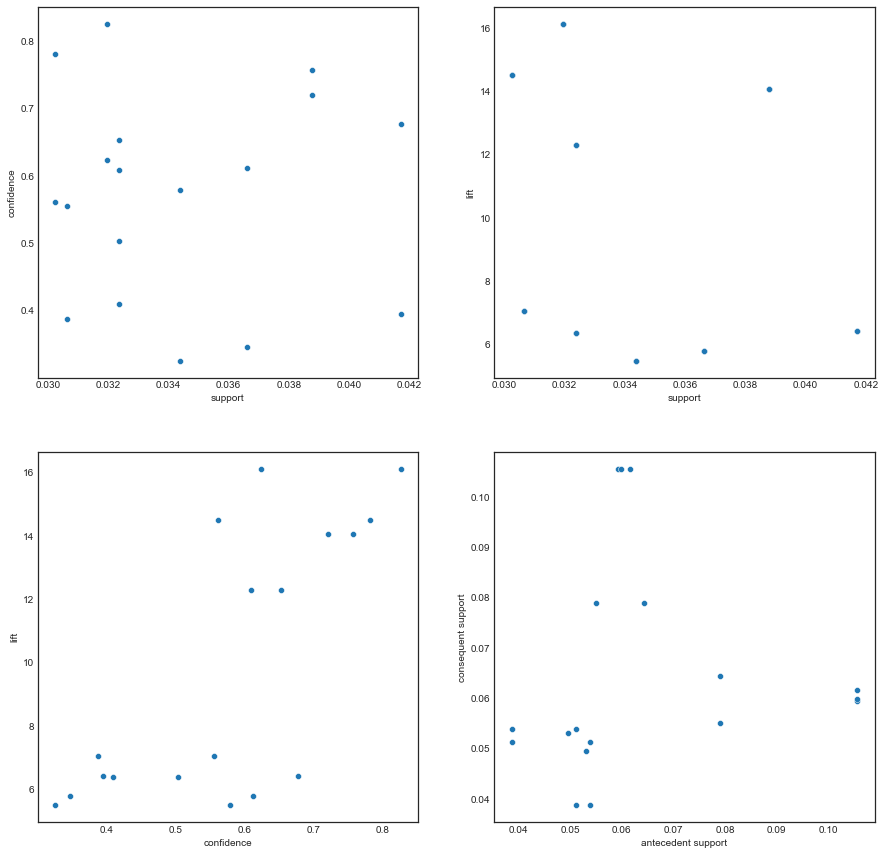

In [26]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules_main)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules_main)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules_main)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules_main)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

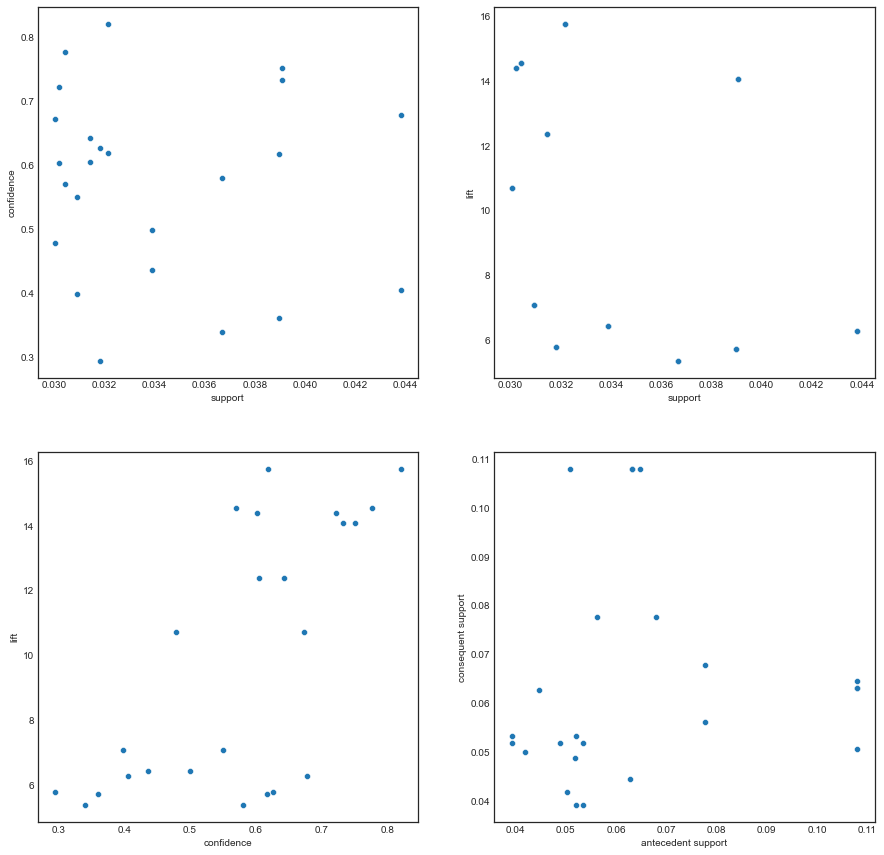

In [27]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules_UK)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules_UK)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules_UK)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules_UK)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

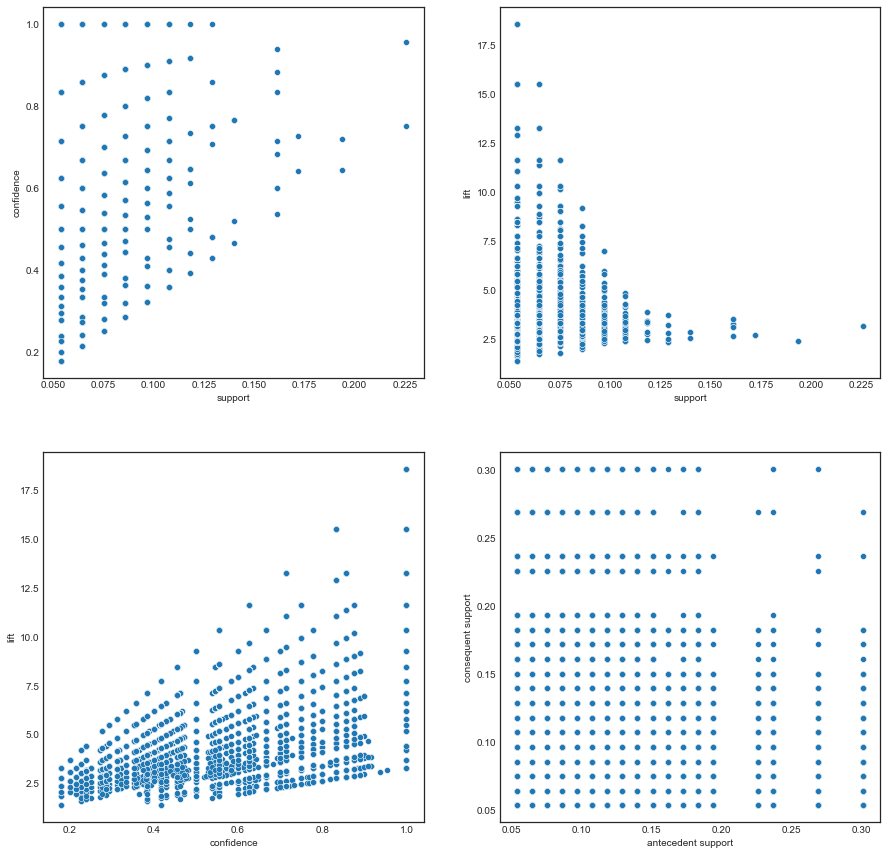

In [28]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules_Netherlands)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules_Netherlands)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules_Netherlands)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules_Netherlands)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

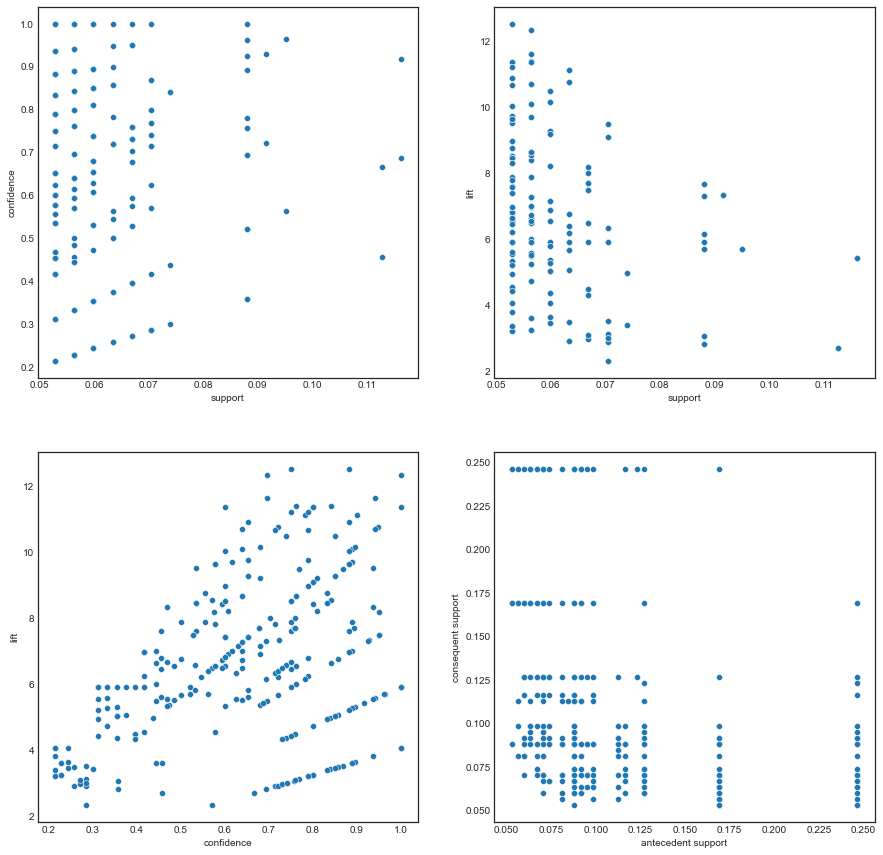

In [29]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules_Ireland)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules_Ireland)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules_Ireland)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules_Ireland)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

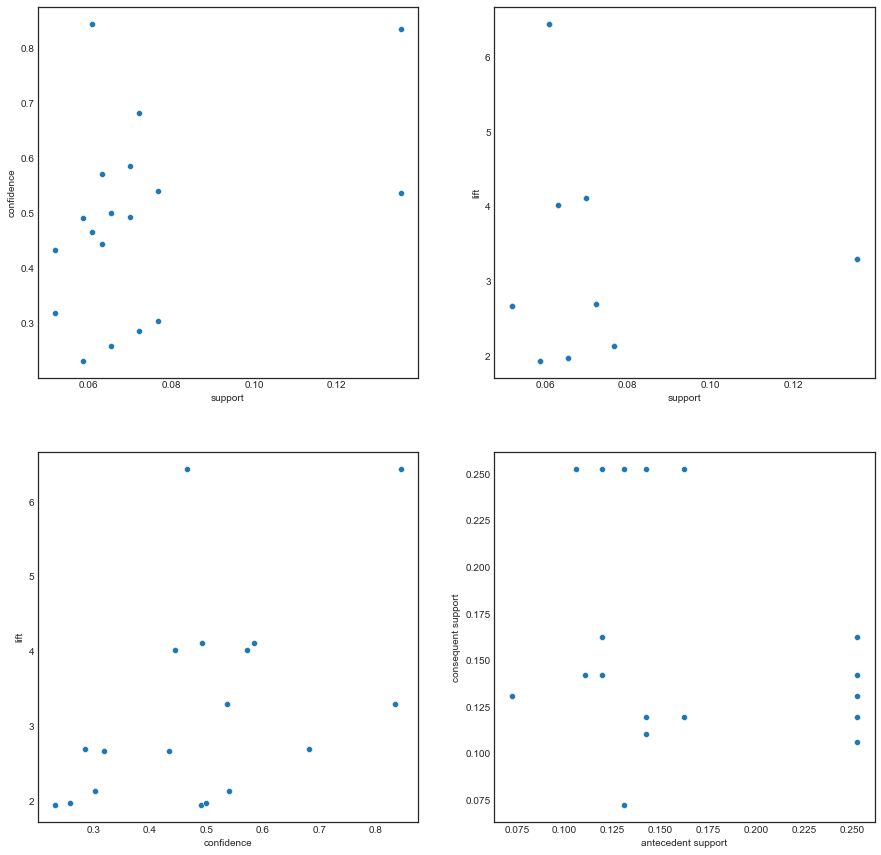

In [30]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules_Germany)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules_Germany)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules_Germany)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules_Germany)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

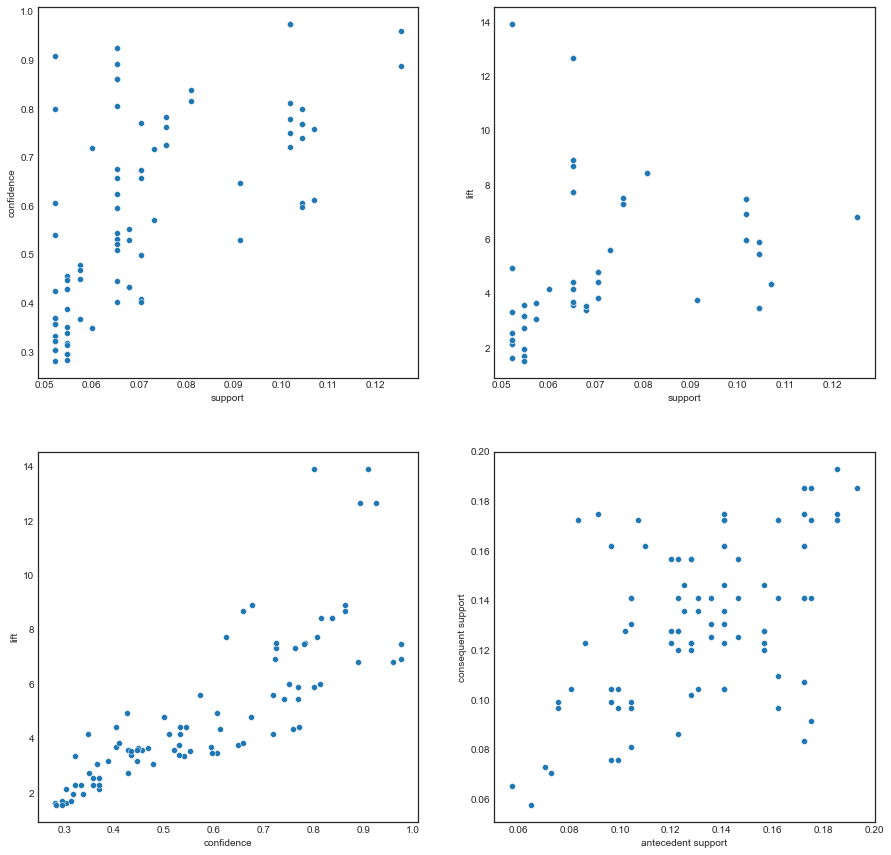

In [31]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules_France)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules_France)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules_France)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules_France)

#### - Heatmaps

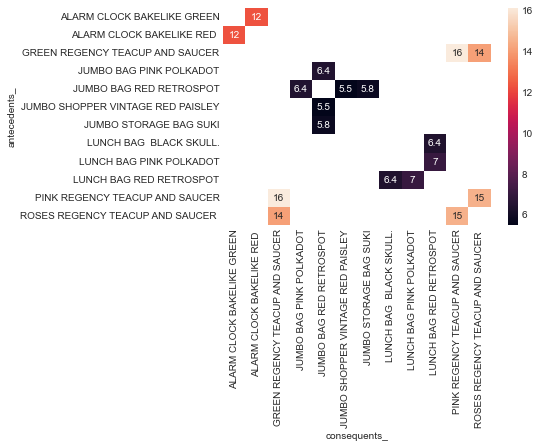

In [32]:
#Heatmap with all data
rules_main['lhs items'] = rules_main['antecedents'].apply(lambda x:len(x) )
rules_main[rules_main['lhs items']>0.3].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_main['antecedents_'] = rules_main['antecedents'].apply(lambda a: ','.join(list(a)))
rules_main['consequents_'] = rules_main['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_main[rules_main['lhs items']>0.3].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_main['antecedents_'] = rules_main['antecedents'].apply(lambda a: ','.join(list(a)))
rules_main['consequents_'] = rules_main['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_main[rules_main['lhs items']>0.3].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

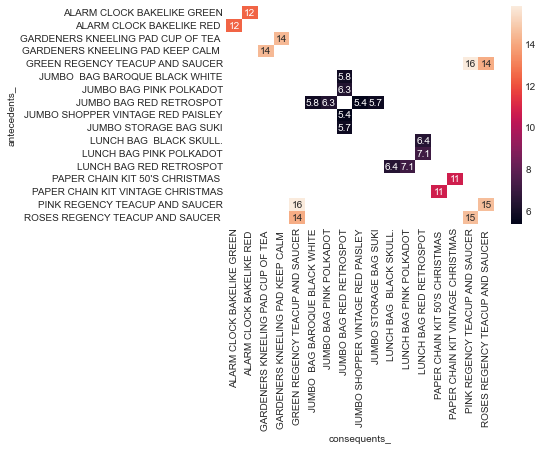

In [33]:
#Heatmap for UK
rules_UK['lhs items'] = rules_UK['antecedents'].apply(lambda x:len(x) )
rules_UK[rules_UK['lhs items']>0.3].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_UK['antecedents_'] = rules_UK['antecedents'].apply(lambda a: ','.join(list(a)))
rules_UK['consequents_'] = rules_UK['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_UK[rules_UK['lhs items']>0.3].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_UK['antecedents_'] = rules_UK['antecedents'].apply(lambda a: ','.join(list(a)))
rules_UK['consequents_'] = rules_UK['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_UK[rules_UK['lhs items']>0.3].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap 
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

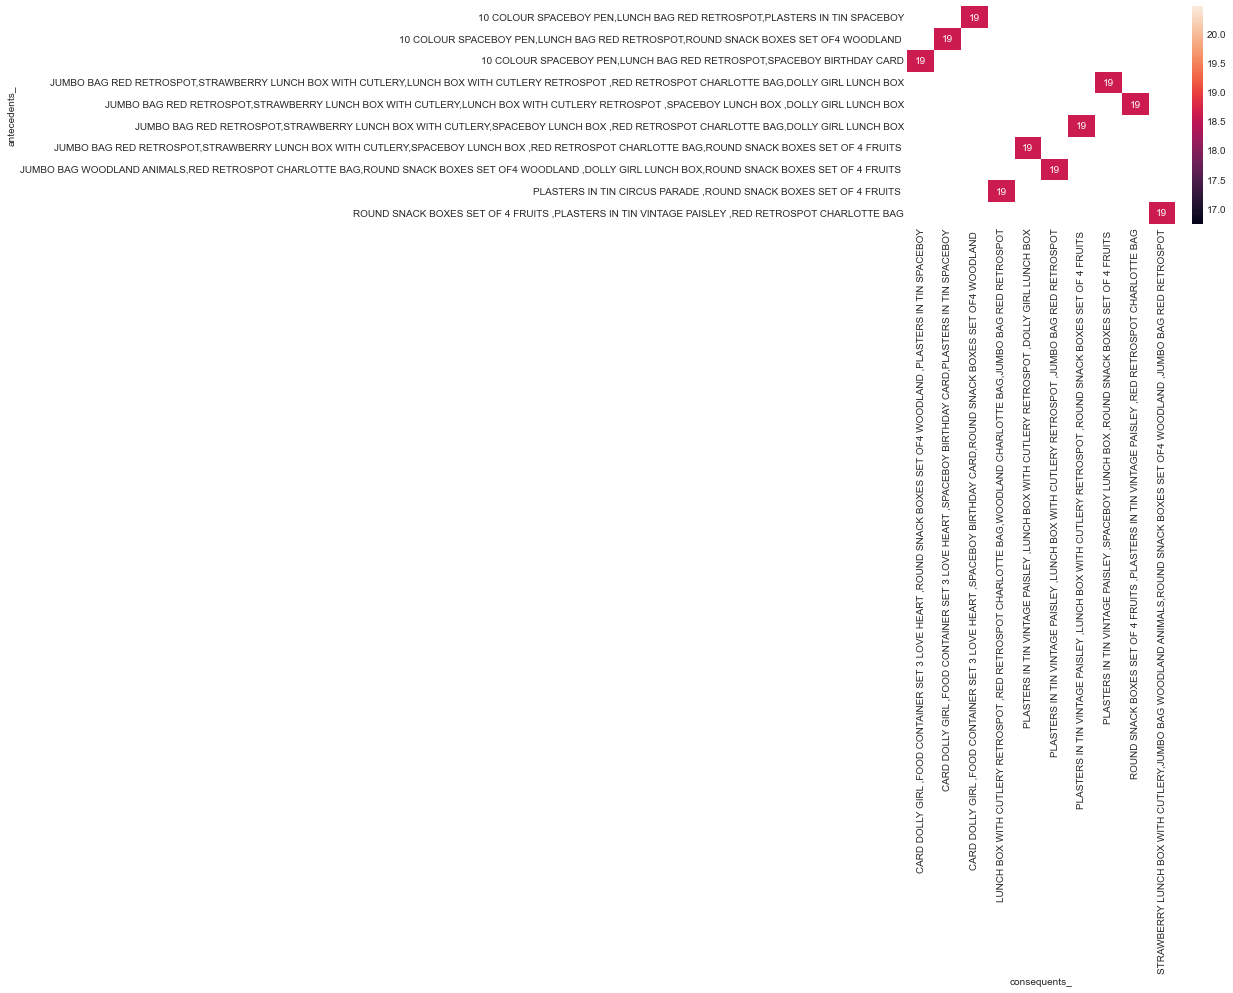

In [34]:
#Heatmap for Netherlands
rules1['lhs items'] = rules1['antecedents'].apply(lambda x:len(x) )
rules1[rules1['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules1['antecedents_'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents_'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules1[rules1['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules1['antecedents_'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents_'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules1[rules1['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap 
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

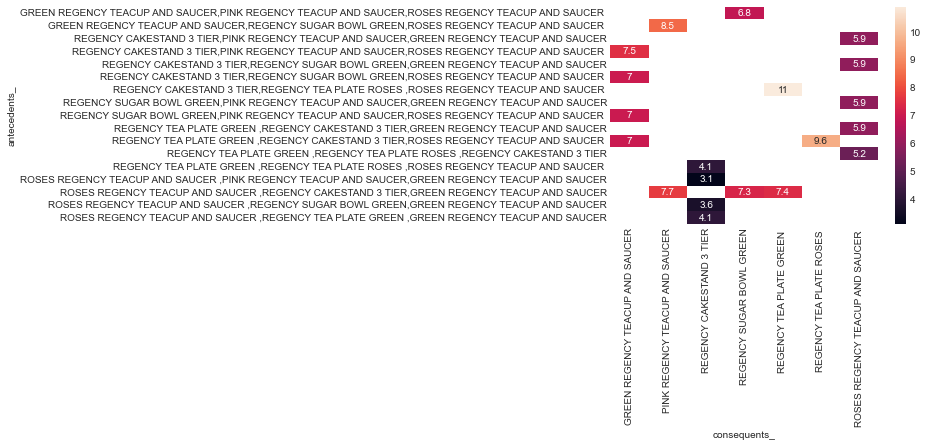

In [35]:
#Heatmap for Ireland
rules_Ireland['lhs items'] = rules_Ireland['antecedents'].apply(lambda x:len(x) )
rules_Ireland[rules_Ireland['lhs items']>2.5].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_Ireland['antecedents_'] = rules_Ireland['antecedents'].apply(lambda a: ','.join(list(a)))
rules_Ireland['consequents_'] = rules_Ireland['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_Ireland[rules_Ireland['lhs items']>2.5].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_Ireland['antecedents_'] = rules_Ireland['antecedents'].apply(lambda a: ','.join(list(a)))
rules_Ireland['consequents_'] = rules_Ireland['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_Ireland[rules_Ireland['lhs items']>2.5].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap 
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

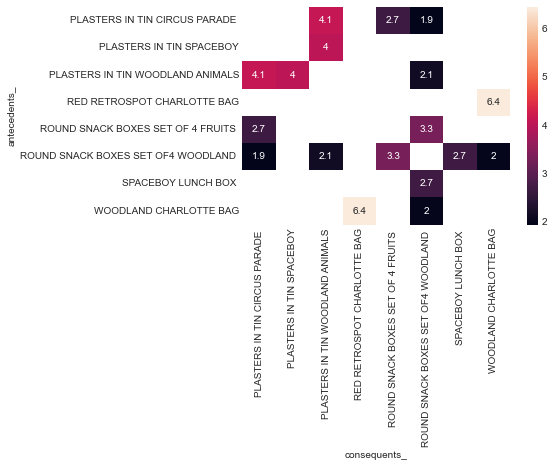

In [36]:
#Heatmap for Germany
rules_Germany['lhs items'] = rules_Germany['antecedents'].apply(lambda x:len(x) )
rules_Germany[rules_Germany['lhs items']>0.5].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_Germany['antecedents_'] = rules_Germany['antecedents'].apply(lambda a: ''.join(list(a)))
rules_Germany['consequents_'] = rules_Germany['consequents'].apply(lambda a: ''.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_Germany[rules_Germany['lhs items']>0.5].pivot(index = 'antecedents_', 
                     columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_Germany['antecedents_'] = rules_Germany['antecedents'].apply(lambda a: ''.join(list(a)))
rules_Germany['consequents_'] = rules_Germany['consequents'].apply(lambda a: ''.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_Germany[rules_Germany['lhs items']>0.5].pivot(index = 'antecedents_', 
                     columns = 'consequents_', values= 'lift')

# Generate a heatmap 
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

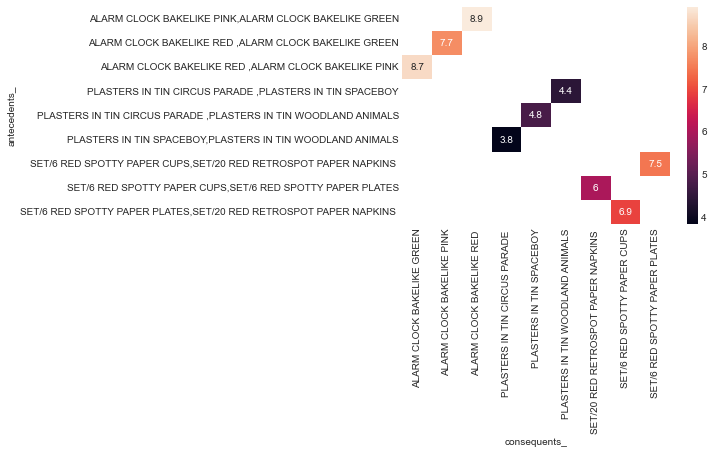

In [37]:
#Heatmap for France
rules_France['lhs items'] = rules_France['antecedents'].apply(lambda x:len(x) )
rules_France[rules_France['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules_France['antecedents_'] = rules_France['antecedents'].apply(lambda a: ','.join(list(a)))
rules_France['consequents_'] = rules_France['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_France[rules_France['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_France['antecedents_'] = rules_France['antecedents'].apply(lambda a: ','.join(list(a)))
rules_France['consequents_'] = rules_France['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_France[rules_France['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap 
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### - Parallel Coordinates Plots

In [38]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

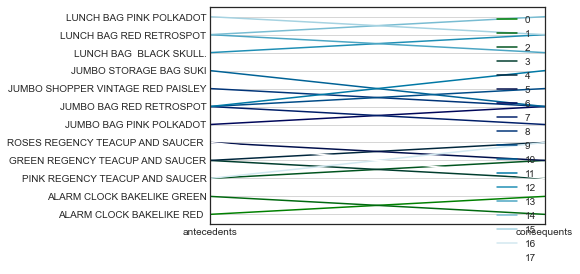

In [39]:
#Parallel Coordinates Plot with all data
# convert rules to coordinates
rules_main['antecedents'] = rules_main['antecedents'].apply(lambda antecedents: list(antecedents)[0])
rules_main['consequents'] = rules_main['consequents'].apply(lambda consequents: list(consequents)[0])
rules_main['rule'] = rules_main.index

# define coordinates and label
coords_main = rules_main[['antecedents', 'consequents', 'rule']]

# generate parallel coordinates plot
parallel_coordinates(coords_main, 'rule', colormap = 'ocean')

<AxesSubplot:>

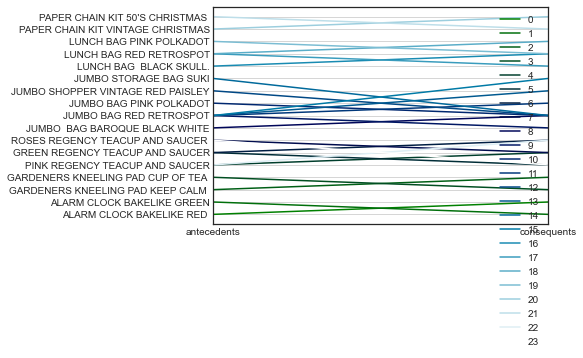

In [40]:
#Parallel Coordinates Plot for UK
# convert rules to coordinates
rules_UK['antecedents'] = rules_UK['antecedents'].apply(lambda antecedents: list(antecedents)[0])
rules_UK['consequents'] = rules_UK['consequents'].apply(lambda consequents: list(consequents)[0])
rules_UK['rule'] = rules_UK.index

# define coordinates and label
coords_UK = rules_UK[['antecedents', 'consequents', 'rule']]

# generate parallel coordinates plot
parallel_coordinates(coords_UK, 'rule', colormap = 'ocean')

<AxesSubplot:>

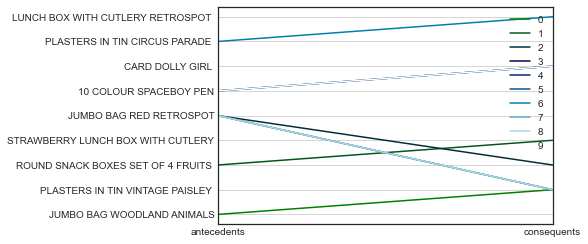

In [41]:
#Parallel Coordinates Plot for Netherlands
# convert rules to coordinates
rules1['antecedents'] = rules1['antecedents'].apply(lambda antecedents: list(antecedents)[0])
rules1['consequents'] = rules1['consequents'].apply(lambda consequents: list(consequents)[0])
rules1['rule'] = rules1.index

# define coordinates and label
coords = rules1[['antecedents', 'consequents', 'rule']]

# generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')

<AxesSubplot:>

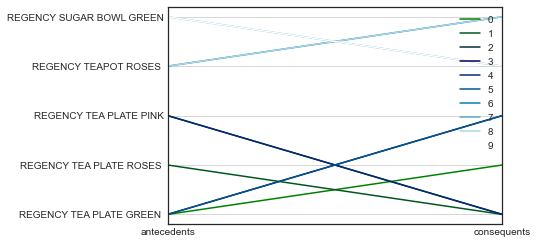

In [42]:
#Parallel Coordinates Plot for Ireland
# convert rules to coordinates
rules2['antecedents'] = rules2['antecedents'].apply(lambda antecedents: list(antecedents)[0])
rules2['consequents'] = rules2['consequents'].apply(lambda consequents: list(consequents)[0])
rules2['rule'] = rules2.index

# define coordinates and label
coords = rules2[['antecedents', 'consequents', 'rule']]

# generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')

<AxesSubplot:>

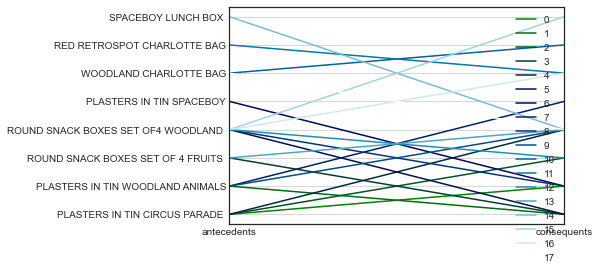

In [43]:
# convert rules to coordinates
rules_Germany['antecedents'] = rules_Germany['antecedents'].apply(lambda antecedents: list(antecedents)[0])
rules_Germany['consequents'] = rules_Germany['consequents'].apply(lambda consequents: list(consequents)[0])
rules_Germany['rule'] = rules_Germany.index

# define coordinates and label
coords = rules_Germany[['antecedents', 'consequents', 'rule']]

# generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')

<AxesSubplot:>

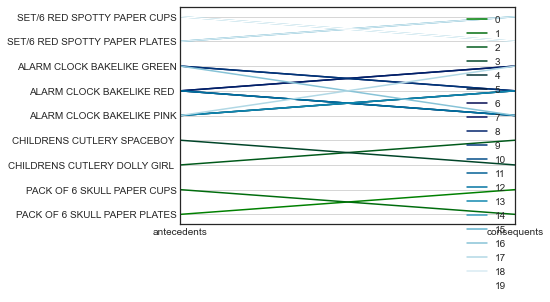

In [44]:
# convert rules to coordinates
rules3['antecedents'] = rules3['antecedents'].apply(lambda antecedents: list(antecedents)[0])
rules3['consequents'] = rules3['consequents'].apply(lambda consequents: list(consequents)[0])
rules3['rule'] = rules3.index

# define coordinates and label
coords = rules3[['antecedents', 'consequents', 'rule']]

# generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')

In [45]:
import plotly.express as px

In [46]:
# define coordinates and label for main
coords = rules_main[['antecedents', 'consequents', 'lift']]

# build plots to show pairwise relationships for main
fig = px.scatter_matrix(coords,
    dimensions=["antecedents", "consequents"],
    color="lift")
fig.show()

In [47]:
# define coordinates and label for UK
coords = rules_UK[['antecedents', 'consequents', 'lift']]

# build plots to show pairwise relationships for UK
fig = px.scatter_matrix(coords,
    dimensions=["antecedents", "consequents"],
    color="lift")
fig.show()

In [48]:
# define coordinates and label for Netherlands
coords = rules1[['antecedents', 'consequents', 'lift']]

# build plots to show pairwise relationships for Netherlands
fig = px.scatter_matrix(coords,
    dimensions=["antecedents", "consequents"],
    color="lift")
fig.show()

In [49]:
# define coordinates and label for Ireland
coords = rules2[['antecedents', 'consequents', 'lift']]

# build plots to show pairwise relationships for Ireland
fig = px.scatter_matrix(coords,
    dimensions=["antecedents", "consequents"],
    color="lift")
fig.show()

In [50]:
# define coordinates and label for Germany
coords = rules_Germany[['antecedents', 'consequents', 'lift']]

# build plots to show pairwise relationships for Germany
fig = px.scatter_matrix(coords,
    dimensions=["antecedents", "consequents"],
    color="lift")
fig.show()

In [51]:
# define coordinates and label for France
coords = rules3[['antecedents', 'consequents', 'lift']]

# build plots to show pairwise relationships for France
fig = px.scatter_matrix(coords,
    dimensions=["antecedents", "consequents"],
    color="lift")
fig.show()

<a class="anchor" id="recommendationsystems">

# 4. Recommendation Systems

</a>

<a class="anchor" id="importdataset2">

## 4.1. Import Dataset

</a>

In [52]:
# Start pre-processing for recommendation system
df_recommendation = pd.read_csv('retail.csv')
df_recommendation

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

<a class="anchor" id="dataexploration2">

## 4.2. Data Exploration

</a>

<a class="anchor" id="datapre-processing2">

### 4.2.1. Data Pre-Processing

</a>

#### - Remove Null Values

In [53]:
# Drop transactions with null customers id's
df_recommendation.dropna(subset=["CustomerID"], inplace=True)
df_recommendation

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[406829 rows x 8 columns]

#### - Explore and Change Datatypes

In [54]:
# Change datatypes
df_recommendation['Description'] = df_recommendation['Description'].astype('str')
df_recommendation.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df_recommendation['InvoiceNo'] = df_recommendation['InvoiceNo'].astype('str')

In [55]:
df_recommendation.replace({'?':np.nan}).dropna()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[406829 rows x 8 columns]

#### - Coherence Checking

In [56]:
filters2 = (
    (~df_recommendation['InvoiceNo'].str.contains('C'))
    &
    (~df_recommendation['InvoiceNo'].str.contains('A'))
    
    &
    (df_recommendation['StockCode'] != 'M')
    &
    (df_recommendation['StockCode'] != 'DOT')
    
    &
    (~df_recommendation['Description'].str.contains('20713'))
    &
    (~df_recommendation['Description'].str.contains("postage", case=False))
    &
    (~df_recommendation['Description'].str.contains("samples", case=False))
    
    &
    (df_recommendation['UnitPrice'] != -11062.06)
    &
    (df_recommendation['UnitPrice'] != 0)
    
    &
    (~df_recommendation['Country'].str.contains("Unspecified"))
    
    &
    (df_recommendation['CustomerID'] != 14646.0)
)

df_recommendation_1 = df_recommendation[filters2]

In [57]:
print('Percentage of data kept after applying filters:', np.round(df_recommendation_1.shape[0] / df_recommendation.shape[0], 4))

Percentage of data kept after applying filters: 0.9689


In [58]:
df_recommendation = df_recommendation_1.copy()

In [59]:
# Check How Many Products Each Customer Bought
df_dist = df_recommendation.groupby(['CustomerID'])['Quantity'].sum()
df_dist.sort_values(ascending=True)

CustomerID
17956.0        1
15823.0        1
14792.0        2
18268.0        2
16257.0        2
           ...  
17450.0    69993
12346.0    74215
12415.0    77373
14911.0    80263
16446.0    80997
Name: Quantity, Length: 4330, dtype: int64

#####  Divide the customers between Individuals and Wholesalers

##### . Total

<AxesSubplot:ylabel='Frequency'>

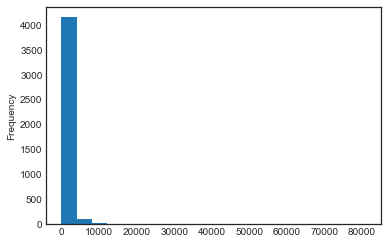

In [60]:
# total
df_dist.plot.hist(bins=20)

##### . Customers as Individuals

<AxesSubplot:ylabel='Frequency'>

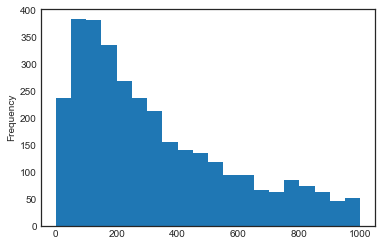

In [61]:
# individuals & hobbyists
df_dist.plot.hist(bins=20, range=(0,1000))

##### . Customers as Wholesalers

<AxesSubplot:ylabel='Frequency'>

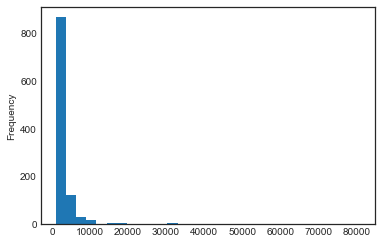

In [62]:
# wholesalers/small businesses
df_dist.plot.hist(bins=30, range=(1001,81000))

#### - Separate Customers by Quantity Bought

In [63]:
# Only consider customers classified as individuals
low_quantity = df_recommendation.groupby(['CustomerID'])['Quantity'].sum() <= 1000
df_ind = df_recommendation[df_recommendation['CustomerID'].isin(low_quantity[low_quantity].index)]

In [64]:
df_ind

InvoiceNo StockCode                      Description  Quantity  \
46        536371     22086  PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258       VICTORIAN SEWING BOX LARGE        32   
142       536382     10002      INFLATABLE POLITICAL GLOBE         12   
143       536382     21912         VINTAGE SNAKES & LADDERS         8   
144       536382     21832             CHOCOLATE CALCULATOR        12   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
46       12/1/2010 9:00       2.55     13748.0  United Kingdom  
65       12/1/2010 9:09      10.95     15100.0  United Kingdom  
142      12/1/2010 9:45       0.85     16098.0  United Kingdom  
143      12/1/2010 9:45       3.75     16098.0  United Kingdom  
144      12/1/2010 9:45       1.65     16098.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[144521 rows x 8 columns]

<a class="anchor" id="featureengineering2">

### 4.2.2 Feature Engineering

</a>

In [65]:
# Create a new variable, which will be an ID for each product
ord_enc = OrdinalEncoder()
df_ind['ProductID'] = ord_enc.fit_transform(df_ind[['Description']])

C:\Users\fujitsu\AppData\Local\Temp/ipykernel_15464/2091219998.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df_ind

InvoiceNo StockCode                      Description  Quantity  \
46        536371     22086  PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258       VICTORIAN SEWING BOX LARGE        32   
142       536382     10002      INFLATABLE POLITICAL GLOBE         12   
143       536382     21912         VINTAGE SNAKES & LADDERS         8   
144       536382     21832             CHOCOLATE CALCULATOR        12   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  ProductID  
46       12/1/2010 9:00       2.55     13748.0  United Kingdom     2182.0  
65       12/1/2010 9:09      10.95     15100.0  United Kingdom     3345.0  
142      12/1/2010 9:45       0.85     16098.0  United Kingdom     1592.0  
143      12/1/2010 9:45       3.75     16098.0  United Kingdom     3418.0  
144      12/1/2010 9:45       1.65     16098.0  United Kingdom      689.0  
...                 ...        ...         ...             ...        ...  
541904  12/9/2011 12:50       0.85     12680.0          France     2123.0  
541905  12/9/2011 12:50       2.10     12680.0          France      654.0  
541906  12/9/2011 12:50       4.15     12680.0          France      660.0  
541907  12/9/2011 12:50       4.15     12680.0          France      659.0  
541908  12/9/2011 12:50       4.95     12680.0          France      256.0  

[144521 rows x 9 columns]

In [67]:
df_ind1 = df_ind.groupby(['CustomerID','Description','ProductID'])['Quantity'].sum().sort_values(ascending=True)
df_ind1

CustomerID  Description                        ProductID
15532.0     GOLD MUG BONE CHINA TREE OF LIFE   1372.0         1
16629.0     BAKING MOULD HEART MILK CHOCOLATE  251.0          1
            CHERRY BLOSSOM  DECORATIVE FLASK   640.0          1
            ENAMEL MEASURING JUG CREAM         1065.0         1
            GLASS JAR DIGESTIVE BISCUITS       1341.0         1
                                                           ... 
17523.0     GIRLS ALPHABET IRON ON PATCHES     1314.0       576
16881.0     ASSORTED COLOURS SILK FAN          215.0        600
12891.0     RED RETROSPOT WRAP                 2587.0       600
17723.0     PARTY BUNTING                      2213.0       750
16927.0     ASSORTED FLOWER COLOUR "LEIS"      220.0        960
Name: Quantity, Length: 122185, dtype: int64

In [68]:
#transform to dataframe
df_ind2 = pd.Series(df_ind1)
df_customer = df_ind2.to_frame()

In [69]:
type(df_customer)

pandas.core.frame.DataFrame

<a class="anchor" id="recommendationsystemscreation">

## 4.3. Recommendation Systems Creation

</a>

In [70]:
df_customer

Quantity
CustomerID Description                       ProductID          
15532.0    GOLD MUG BONE CHINA TREE OF LIFE  1372.0            1
16629.0    BAKING MOULD HEART MILK CHOCOLATE 251.0             1
           CHERRY BLOSSOM  DECORATIVE FLASK  640.0             1
           ENAMEL MEASURING JUG CREAM        1065.0            1
           GLASS JAR DIGESTIVE BISCUITS      1341.0            1
...                                                          ...
17523.0    GIRLS ALPHABET IRON ON PATCHES    1314.0          576
16881.0    ASSORTED COLOURS SILK FAN         215.0           600
12891.0    RED RETROSPOT WRAP                2587.0          600
17723.0    PARTY BUNTING                     2213.0          750
16927.0    ASSORTED FLOWER COLOUR "LEIS"     220.0           960

[122185 rows x 1 columns]

In [71]:
# prepare dataset in order to built the recommendation system
df_customer.reset_index(level=0, inplace=True)
df_customer

CustomerID  Quantity
Description                       ProductID                      
GOLD MUG BONE CHINA TREE OF LIFE  1372.0        15532.0         1
BAKING MOULD HEART MILK CHOCOLATE 251.0         16629.0         1
CHERRY BLOSSOM  DECORATIVE FLASK  640.0         16629.0         1
ENAMEL MEASURING JUG CREAM        1065.0        16629.0         1
GLASS JAR DIGESTIVE BISCUITS      1341.0        16629.0         1
...                                                 ...       ...
GIRLS ALPHABET IRON ON PATCHES    1314.0        17523.0       576
ASSORTED COLOURS SILK FAN         215.0         16881.0       600
RED RETROSPOT WRAP                2587.0        12891.0       600
PARTY BUNTING                     2213.0        17723.0       750
ASSORTED FLOWER COLOUR "LEIS"     220.0         16927.0       960

[122185 rows x 2 columns]

<a class="anchor" id="creatingratings">

### 4.3.1. Creating Ratings

</a>

In [72]:
# Create a new variable which will store the ratings for each product
result = []
for value in df_customer["Quantity"]:
    if value <= 10:
        result.append("1")
    elif value > 10 and value <= 25:
        result.append("2")
    elif value > 25 and value <= 50:
        result.append("3")
    else:
        result.append("4")
       
df_customer["Quantity Rating"] = result   
print(df_customer)

                                             CustomerID  Quantity  \
Description                       ProductID                         
GOLD MUG BONE CHINA TREE OF LIFE  1372.0        15532.0         1   
BAKING MOULD HEART MILK CHOCOLATE 251.0         16629.0         1   
CHERRY BLOSSOM  DECORATIVE FLASK  640.0         16629.0         1   
ENAMEL MEASURING JUG CREAM        1065.0        16629.0         1   
GLASS JAR DIGESTIVE BISCUITS      1341.0        16629.0         1   
...                                                 ...       ...   
GIRLS ALPHABET IRON ON PATCHES    1314.0        17523.0       576   
ASSORTED COLOURS SILK FAN         215.0         16881.0       600   
RED RETROSPOT WRAP                2587.0        12891.0       600   
PARTY BUNTING                     2213.0        17723.0       750   
ASSORTED FLOWER COLOUR "LEIS"     220.0         16927.0       960   

                                            Quantity Rating  
Description                       Produc

In [73]:
df_customer["Quantity Rating"].value_counts()

1    87857
2    29365
3     3574
4     1389
Name: Quantity Rating, dtype: int64

In [74]:
df_customer

CustomerID  Quantity  \
Description                       ProductID                         
GOLD MUG BONE CHINA TREE OF LIFE  1372.0        15532.0         1   
BAKING MOULD HEART MILK CHOCOLATE 251.0         16629.0         1   
CHERRY BLOSSOM  DECORATIVE FLASK  640.0         16629.0         1   
ENAMEL MEASURING JUG CREAM        1065.0        16629.0         1   
GLASS JAR DIGESTIVE BISCUITS      1341.0        16629.0         1   
...                                                 ...       ...   
GIRLS ALPHABET IRON ON PATCHES    1314.0        17523.0       576   
ASSORTED COLOURS SILK FAN         215.0         16881.0       600   
RED RETROSPOT WRAP                2587.0        12891.0       600   
PARTY BUNTING                     2213.0        17723.0       750   
ASSORTED FLOWER COLOUR "LEIS"     220.0         16927.0       960   

                                            Quantity Rating  
Description                       ProductID                  
GOLD MUG BONE CHINA TREE OF LIFE  1372.0                  1  
BAKING MOULD HEART MILK CHOCOLATE 251.0                   1  
CHERRY BLOSSOM  DECORATIVE FLASK  640.0                   1  
ENAMEL MEASURING JUG CREAM        1065.0                  1  
GLASS JAR DIGESTIVE BISCUITS      1341.0                  1  
...                                                     ...  
GIRLS ALPHABET IRON ON PATCHES    1314.0                  4  
ASSORTED COLOURS SILK FAN         215.0                   4  
RED RETROSPOT WRAP                2587.0                  4  
PARTY BUNTING                     2213.0                  4  
ASSORTED FLOWER COLOUR "LEIS"     220.0                   4  

[122185 rows x 3 columns]

In [75]:
df_customer.reset_index(level=0, inplace=True)
df_customer

Description  CustomerID  Quantity  \
ProductID                                                            
1372.0      GOLD MUG BONE CHINA TREE OF LIFE     15532.0         1   
251.0      BAKING MOULD HEART MILK CHOCOLATE     16629.0         1   
640.0       CHERRY BLOSSOM  DECORATIVE FLASK     16629.0         1   
1065.0            ENAMEL MEASURING JUG CREAM     16629.0         1   
1341.0          GLASS JAR DIGESTIVE BISCUITS     16629.0         1   
...                                      ...         ...       ...   
1314.0       GIRLS ALPHABET IRON ON PATCHES      17523.0       576   
215.0              ASSORTED COLOURS SILK FAN     16881.0       600   
2587.0                   RED RETROSPOT WRAP      12891.0       600   
2213.0                         PARTY BUNTING     17723.0       750   
220.0          ASSORTED FLOWER COLOUR "LEIS"     16927.0       960   

          Quantity Rating  
ProductID                  
1372.0                  1  
251.0                   1  
640.0                   1  
1065.0                  1  
1341.0                  1  
...                   ...  
1314.0                  4  
215.0                   4  
2587.0                  4  
2213.0                  4  
220.0                   4  

[122185 rows x 4 columns]

In [76]:
df_customer.reset_index(level=0, inplace=True)
df_customer

ProductID                        Description  CustomerID  Quantity  \
0          1372.0   GOLD MUG BONE CHINA TREE OF LIFE     15532.0         1   
1           251.0  BAKING MOULD HEART MILK CHOCOLATE     16629.0         1   
2           640.0   CHERRY BLOSSOM  DECORATIVE FLASK     16629.0         1   
3          1065.0         ENAMEL MEASURING JUG CREAM     16629.0         1   
4          1341.0       GLASS JAR DIGESTIVE BISCUITS     16629.0         1   
...           ...                                ...         ...       ...   
122180     1314.0    GIRLS ALPHABET IRON ON PATCHES      17523.0       576   
122181      215.0          ASSORTED COLOURS SILK FAN     16881.0       600   
122182     2587.0                RED RETROSPOT WRAP      12891.0       600   
122183     2213.0                      PARTY BUNTING     17723.0       750   
122184      220.0      ASSORTED FLOWER COLOUR "LEIS"     16927.0       960   

       Quantity Rating  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
122180               4  
122181               4  
122182               4  
122183               4  
122184               4  

[122185 rows x 5 columns]

In [77]:
n_ratings = len(df_customer['Quantity Rating'])
n_products = len(df_customer['ProductID'].unique())
n_customers = len(df_customer['CustomerID'].unique())

In [78]:
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique productId's: {n_products}")
print(f"Number of unique customers: {n_customers}")
print(f"Average ratings per customers: {round(n_ratings/n_customers, 2)}")
print(f"Average ratings per product: {round(n_ratings/n_products, 2)}")

Number of ratings: 122185
Number of unique productId's: 3667
Number of unique customers: 3257
Average ratings per customers: 37.51
Average ratings per product: 33.32


In [79]:
customer_freq = df_customer[['CustomerID', 'ProductID']].groupby('CustomerID').count().reset_index()
customer_freq.columns = ['CustomerID', 'n_ratings']
customer_freq.head()

CustomerID  n_ratings
0     12349.0         72
1     12350.0         16
2     12352.0         57
3     12353.0          4
4     12354.0         58

<a class="anchor" id="lowestandhighest">

### 4.3.2. Discover Lowest and Highest Rated Products

</a>

In [80]:
mean_rating = df_customer.groupby('ProductID')[['Quantity Rating']].mean()

In [81]:
# Lowest rated products
lowest_rated = mean_rating['Quantity Rating'].idxmin()
df_customer.loc[df_customer['ProductID'] == lowest_rated]

ProductID                       Description  CustomerID  Quantity  \
77214       37.0  3 BLACK CATS W HEARTS BLANK CARD     15872.0         6   

      Quantity Rating  
77214               1

In [82]:
# Highest rated products
highest_rated = mean_rating['Quantity Rating'].idxmax()
df_customer.loc[df_customer['ProductID'] == highest_rated]

ProductID                    Description  CustomerID  Quantity  \
9837        207.0  ASSORTED COLOUR BIRD ORNAMENT     15854.0         1   
13930       207.0  ASSORTED COLOUR BIRD ORNAMENT     14529.0         1   
20618       207.0  ASSORTED COLOUR BIRD ORNAMENT     18004.0         1   
20697       207.0  ASSORTED COLOUR BIRD ORNAMENT     12556.0         1   
22525       207.0  ASSORTED COLOUR BIRD ORNAMENT     17976.0         1   
...           ...                            ...         ...       ...   
122034      207.0  ASSORTED COLOUR BIRD ORNAMENT     14035.0       176   
122035      207.0  ASSORTED COLOUR BIRD ORNAMENT     13321.0       176   
122046      207.0  ASSORTED COLOUR BIRD ORNAMENT     17671.0       184   
122085      207.0  ASSORTED COLOUR BIRD ORNAMENT     14233.0       200   
122155      207.0  ASSORTED COLOUR BIRD ORNAMENT     13525.0       320   

       Quantity Rating  
9837                 1  
13930                1  
20618                1  
20697                1  
22525                1  
...                ...  
122034               4  
122035               4  
122046               4  
122085               4  
122155               4  

[399 rows x 5 columns]

In [83]:
# show number of people who rated products rated product highest
df_customer[df_customer['ProductID']==highest_rated]

ProductID                    Description  CustomerID  Quantity  \
9837        207.0  ASSORTED COLOUR BIRD ORNAMENT     15854.0         1   
13930       207.0  ASSORTED COLOUR BIRD ORNAMENT     14529.0         1   
20618       207.0  ASSORTED COLOUR BIRD ORNAMENT     18004.0         1   
20697       207.0  ASSORTED COLOUR BIRD ORNAMENT     12556.0         1   
22525       207.0  ASSORTED COLOUR BIRD ORNAMENT     17976.0         1   
...           ...                            ...         ...       ...   
122034      207.0  ASSORTED COLOUR BIRD ORNAMENT     14035.0       176   
122035      207.0  ASSORTED COLOUR BIRD ORNAMENT     13321.0       176   
122046      207.0  ASSORTED COLOUR BIRD ORNAMENT     17671.0       184   
122085      207.0  ASSORTED COLOUR BIRD ORNAMENT     14233.0       200   
122155      207.0  ASSORTED COLOUR BIRD ORNAMENT     13525.0       320   

       Quantity Rating  
9837                 1  
13930                1  
20618                1  
20697                1  
22525                1  
...                ...  
122034               4  
122035               4  
122046               4  
122085               4  
122155               4  

[399 rows x 5 columns]

In [84]:
# show number of people who rated products rated product lowest
df_customer[df_customer['ProductID']==lowest_rated]

ProductID                       Description  CustomerID  Quantity  \
77214       37.0  3 BLACK CATS W HEARTS BLANK CARD     15872.0         6   

      Quantity Rating  
77214               1

<a class="anchor" id="matrix">

### 4.3.3. Create User-Item Matrix

</a>

In [85]:
from scipy.sparse import csr_matrix
  
def create_matrix(df):
      
    N = len(df_customer['CustomerID'].unique())
    M = len(df_customer['ProductID'].unique())
      
    # Map Ids to indices
    customer_mapper = dict(zip(np.unique(df_customer["CustomerID"]), list(range(N))))
    product_mapper = dict(zip(np.unique(df_customer["ProductID"]), list(range(M))))
      
    # Map indices to IDs
    customer_inv_mapper = dict(zip(list(range(N)), np.unique(df_customer["CustomerID"])))
    product_inv_mapper = dict(zip(list(range(M)), np.unique(df_customer["ProductID"])))
      
    customer_index = [customer_mapper[i] for i in df_customer['CustomerID']]
    product_index = [product_mapper[i] for i in df_customer['ProductID']]
  # create the matrix
    X = csr_matrix((df_customer["Quantity Rating"], (product_index, customer_index)), shape=(M, N))
      
    return X, customer_mapper, product_mapper, customer_inv_mapper, product_inv_mapper

In [86]:
df_customer.dtypes

ProductID          float64
Description         object
CustomerID         float64
Quantity             int64
Quantity Rating     object
dtype: object

In [87]:
df_customer["Quantity Rating"] = df_customer["Quantity Rating"].astype("int64")

In [88]:
df_customer.dtypes

ProductID          float64
Description         object
CustomerID         float64
Quantity             int64
Quantity Rating      int64
dtype: object

In [89]:
X, customer_mapper, product_mapper, customer_inv_mapper, product_inv_mapper = create_matrix(df_customer)

<a class="anchor" id="similar">

### 4.3.4. Check Similar Products

</a>

In [90]:
from sklearn.neighbors import NearestNeighbors
"""
Find similar products using KNN
"""
# create a function where we avaluate the similarities using K nearest neighbours
def find_similar_products(product_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    product_ind = product_mapper[product_id]
    product_vec = X[product_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    product_vec = product_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(product_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(product_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [102]:
# Get the recommendations for our dataset
product_titles = dict(zip(df_customer['ProductID'], df_customer['Description']))
 
product_id = 3
  
similar_ids = find_similar_products(product_id, X, k=10)
product_title = product_titles[product_id]
  
print(f"Since you bought {product_title}")
for i in similar_ids:
    print(product_titles[i])

Since you bought  I LOVE LONDON MINI BACKPACK
SPACEBOY MINI BACKPACK
I LOVE LONDON BEAKER
SET 2 TEA TOWELS I LOVE LONDON 
DOLLY GIRL MINI BACKPACK
RASTA IN BATH W SPLIFF ASHTRAY
LONDON BUS COFFEE MUG
WOODLAND MINI BACKPACK
PACK OF 12 LONDON TISSUES 
TOTE BAG I LOVE LONDON
CHAMPAGNE TRAY BLANK CARD


<a class="anchor" id="visualizations2">

### 4.3.5. Recommendation Systems Visualizations

</a>

#### - Histogram

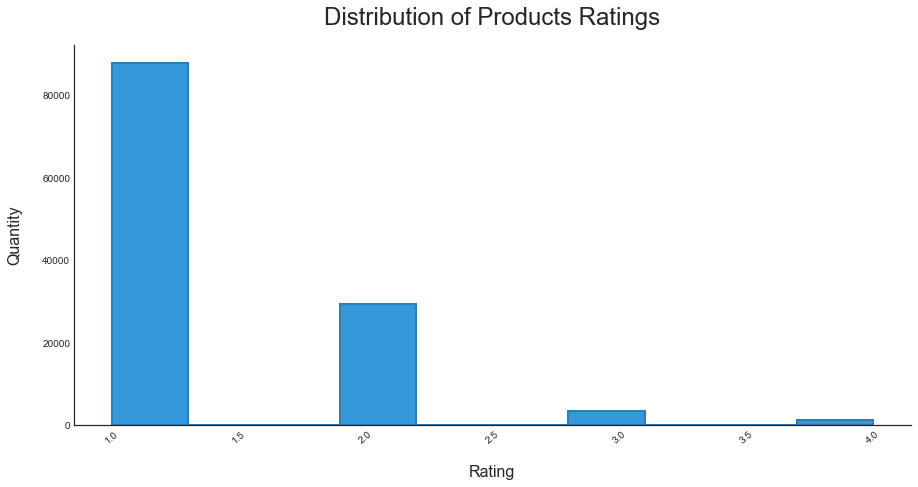

In [92]:
#histogram to visualize variable "Quantity Rating"
def make_histogram(dataset, attribute, bins=10, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'Quantity Rating':
        dataset = dataset[dataset['Quantity Rating'] != 9999]
        
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=40)
    
make_histogram(df_customer, 'Quantity Rating', title='Distribution of Products Ratings', xlab='Rating', ylab='Quantity')


#### - Pie Chart

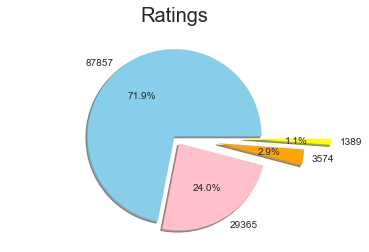

In [93]:
#pie chart to visualize variable "Quantity Rating"
ratings = (df_customer["Quantity Rating"].value_counts())

colors = ['skyblue', 'pink', 'orange', 'yellow']
highlight=(0,0.1,0.5,0.8)
axis("equal");
pie(ratings, labels=ratings, explode= highlight, colors= colors, autopct='%2.1f%%', shadow=True, startangle=0)
plt.title("Ratings", fontsize=20)
show()

<a class="anchor" id="coldstart">

# 5. Cold Start

</a>

In [94]:
# using same dataframe as market basket analysis
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  AmountSpent  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom        15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom        22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom        20.34

<a class="anchor" id="popular">

## 5.1 Identify Most Popular Products

</a>

#### - Most Popular Products

In [95]:
# 5 most popular items overall
n = 5
df['Description'].value_counts()[:n].index.tolist()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'JUMBO BAG RED RETROSPOT',
 'REGENCY CAKESTAND 3 TIER',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT']

#### - Most Popular Products by Country

In [96]:
# df of 3 most popular items by country
cold_start = df.groupby('Country')['Description'].apply(lambda x: x.value_counts().head(3))
cold_start = cold_start.to_frame().reset_index()
cold_start.rename(columns = {'level_1':'Description', 'Description':'Count'}, inplace = True)
cold_start

Country                          Description  Count
0               Australia        RED TOADSTOOL LED NIGHT LIGHT      9
1               Australia    SET OF 3 CAKE TINS PANTRY DESIGN       9
2               Australia              LUNCH BAG RED RETROSPOT      8
3                 Austria     RETROSPOT TEA SET CERAMIC 11 PC       4
4                 Austria  ROUND SNACK BOXES SET OF4 WOODLAND       4
..                    ...                                  ...    ...
106  United Arab Emirates               6 RIBBONS RUSTIC CHARM      1
107  United Arab Emirates             36 FOIL STAR CAKE CASES       1
108        United Kingdom   WHITE HANGING HEART T-LIGHT HOLDER   2227
109        United Kingdom              JUMBO BAG RED RETROSPOT   1957
110        United Kingdom             REGENCY CAKESTAND 3 TIER   1710

[111 rows x 3 columns]

#### - Most Popular Products in the UK

In [97]:
# 3 most popular items in the UK
cold_start.loc[cold_start['Country'] == 'United Kingdom']

Country                         Description  Count
108  United Kingdom  WHITE HANGING HEART T-LIGHT HOLDER   2227
109  United Kingdom             JUMBO BAG RED RETROSPOT   1957
110  United Kingdom            REGENCY CAKESTAND 3 TIER   1710

#### - Most Popular Products in the Netherlands

In [98]:
# 3 most popular items in the Netherlands
cold_start.loc[cold_start['Country'] == 'Netherlands']

Country                          Description  Count
72  Netherlands                  SPACEBOY LUNCH BOX      28
73  Netherlands  ROUND SNACK BOXES SET OF4 WOODLAND      25
74  Netherlands                 DOLLY GIRL LUNCH BOX     22

#### - Most Popular Products in Ireland

In [99]:
# 3 most popular items in Ireland
cold_start.loc[cold_start['Country'] == 'EIRE']

Country                       Description  Count
30    EIRE                          CARRIAGE    106
31    EIRE          REGENCY CAKESTAND 3 TIER     72
32    EIRE  ROSES REGENCY TEACUP AND SAUCER      48

#### - Most Popular Products in Germany

In [100]:
# 3 most popular items in Germany
cold_start.loc[cold_start['Country'] == 'Germany']

Country                          Description  Count
42  Germany  ROUND SNACK BOXES SET OF4 WOODLAND     113
43  Germany   ROUND SNACK BOXES SET OF 4 FRUITS      72
44  Germany     PLASTERS IN TIN WOODLAND ANIMALS     64

#### - Most Popular Products in France

In [101]:
# 3 most popular items in France
cold_start.loc[cold_start['Country'] == 'France']

Country                       Description  Count
39  France                RABBIT NIGHT LIGHT     74
40  France     RED TOADSTOOL LED NIGHT LIGHT     71
41  France  PLASTERS IN TIN WOODLAND ANIMALS     68